# Notebook de poblaciones: ecuaciones diferenciales.

En este notebook se van a hacer todas las prácticas y pruebas del libro de Blanchard y Devaney. 

In [1]:
using LaTeXStrings
using PyCall
using CairoMakie


np = pyimport("numpy")

PyObject <module 'numpy' from '/home/rogve98/anaconda3bash/lib/python3.9/site-packages/numpy/__init__.py'>

Para resolver ecuaciones diferenciales de las cuales no tengamos su solución analítica, vamos a utilizar el método de Runge-Kutta orden 4 para tener una solución aproximada.

In [40]:
"""RK4

Runge-Kutta 4. Es un integrador para resolver sistemas de ecuaciones diferenciales aunque
probablemente también pueda resolver ecuaciones diferenciales normales.

Parámetros:

f := función de variables Real
x0 := condiciones iniciales del sistema dinámico
t0 := tiempo inicial
tf := tiempo final
h := paso de integración
"""

function RK4(f,x0,t0,tf,h)
    #=al igual que en la función de eulerND, definimos una matriz de dimensión 
    (número de iteraciones × dimensión del sistema dinámico) como conjunto solución=#
    t = range(t0, stop = tf, step = h)
    n = length(t)
    dim = length(x0)
    #lo hacemos en un arreglo de ceros
    xs = zeros(n,dim)
    #imponemos la condición inicial en el primer renglón
    xs[1,:] = x0
    #generamos un ciclo for con las iteraciones de runge-kutta de cuarto orden
    for i in  2:n
        k1 = f(xs[i-1,:])
        k2 = f(xs[i-1,:]+(h/2)*k1)
        k3 = f(xs[i-1,:]+(h/2)*k2)
        k4 = f(xs[i-1,:]+h*k3)
        
        xs[i,:] = xs[i-1,:] + (h/6)*(k1+2*k2+2*k3+k4)
    end
    #=regresamos el resultado en una tupla, con los tiempos en la primera entrada y 
    el conjunto solución en la segunda entrada=#
    return (t , xs)
end

RK4 (generic function with 1 method)

## Modelo logístico de población

In [41]:
function modeloLogistico(x0,t0,tf,h)
    
    function P(X)
        #vector de una entrada
        return [2*(1-X[1]/10)*X[1]]
    end
    return RK4(P,x0,t0,tf,h)
end

modeloLogistico (generic function with 1 method)

In [42]:
x0 = [0.1]
x1 = [17]
x2 = [-0.1]
t , sol0 = modeloLogistico(x0,0,10,0.01)
t , sol1 = modeloLogistico(x1,0,10,0.01)
t , sol2 = modeloLogistico(x2,0,10,0.01)

(0.0:0.01:10.0, [-0.1; -0.10204074759822226; … ; -Inf; -Inf;;])

In [43]:
plot(t,sol0,w=2,label = L"Condición inicial $P_0<N$", title="Solución de la ecuación logística",
xlabel  = "Tiempo", ylabel = L"P(t)",ylims = [-10,17])
plot!(t,sol1,w=2, label = L"Condición inicial $P_0>N$")
plot!(t,sol2,w=2,label = L"Condición inicial $P_0<0$")
hline!([10,0],s=:dash,w=2,color="orange",label="Puntos de estabilidad")
hline!([5],s=:dash,w=2,color ="cyan",label ="")

savefig("Ecuación logística")

LoadError: PlotMethodError: no [36mplot[39m method for arguments [36m(::StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}, Int64}, ::Matrix{Float64})[39m. To support these arguments, define
  [36mplot!(::Combined{Any, S} where S<:Tuple{StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}, Int64}, Matrix{Float64}})[39m
Available methods are:
  plot!(plot::Combined{Any, <:Tuple{AbstractVector{<:Complex}}}) in Makie at /home/rogve98/.julia/packages/Makie/xbI6d/src/basic_recipes/convenience_functions.jl:1


## Modelo logístico modificado

In [44]:
function modeloLogisticoM(x0,t0,tf,h)
    
    function P(X)
        #vector de una entrada
        return [2*(1-X[1]/10)*(X[1]/3-1)*X[1]]
    end
    return RK4(P,x0,t0,tf,h)
end

modeloLogisticoM (generic function with 1 method)

In [45]:
x0 = [15]
x1 = [3.1]
x2 = [2.9]
t , sol0 = modeloLogisticoM(x0,0,10,0.01)
t , sol1 = modeloLogisticoM(x1,0,10,0.01)
t , sol2 = modeloLogisticoM(x2,0,10,0.01)

(0.0:0.01:10.0, [2.9; 2.8986180647580806; … ; 6.786110526756635e-7; 6.651736574152436e-7;;])

In [46]:
plot(t,sol0,w=2,label = L"Condición inicial $P_0>N$", title="Solución de la ecuación logística",
xlabel  = "Tiempo", ylabel = L"P(t)",ylims = [-0,15])
plot!(t,sol1,w=2, label = L"Condición inicial $M<P_0<N$")
plot!(t,sol2,w=2,label = L"Condición inicial $P_0<M$")
hline!([10],s=:dash,w=2,color="magenta",label=L"$N$ Capacidad de soporte")
hline!([3],s=:dash,w=2,color="purple",label=L"$M$ Constante de escasez")
hline!([6.5],s=:dash,w=2,color ="cyan",label ="")

savefig("logístico modificado")

LoadError: PlotMethodError: no [36mplot[39m method for arguments [36m(::StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}, Int64}, ::Matrix{Float64})[39m. To support these arguments, define
  [36mplot!(::Combined{Any, S} where S<:Tuple{StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}, Int64}, Matrix{Float64}})[39m
Available methods are:
  plot!(plot::Combined{Any, <:Tuple{AbstractVector{<:Complex}}}) in Makie at /home/rogve98/.julia/packages/Makie/xbI6d/src/basic_recipes/convenience_functions.jl:1


## Eigenvalores reales de sistemas lineales.

Vamos a revisar en esta sección algunos ejemplos que presenta blanchard para diferenciar los diferentes casos en los eigenvalores de la matriz de interacciones.

### Puntos silla

Cuando tenemos eigenvalores reales pero diferentes y $\lambda_1>0$ y $\lambda_2<0$ entonces tenemos estos ejemplos. Para el sistema

$$
\frac{dY}{dt}=AY,\qquad \text{donde }A=\begin{pmatrix}
-3 & 0\\
0 & 2
\end{pmatrix}
$$

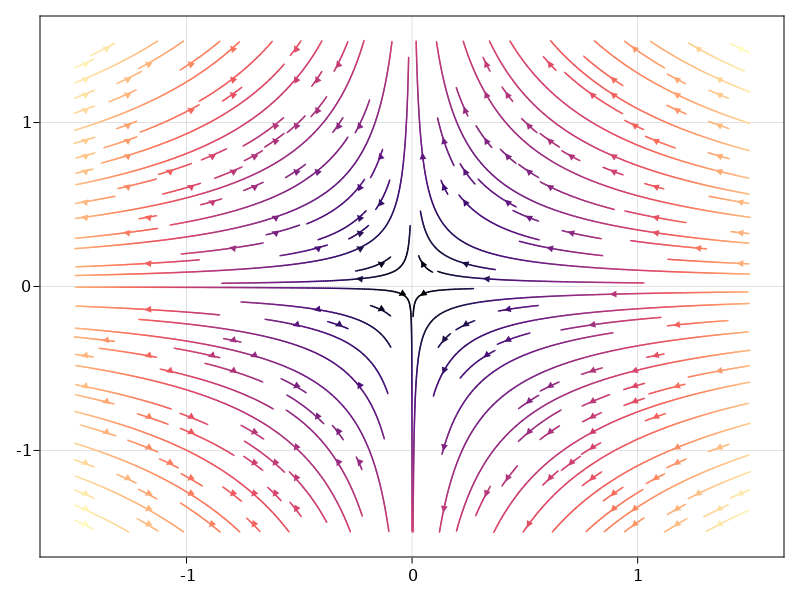

In [79]:
f(X) = Point2(-3X[1],2X[2])
streamplot(f,-1.5..1.5,-1.5..1.5, colormap=:magma,arrow_size=9)

El otro sistema es:

$$
\frac{dY}{dt}=BY,\qquad \text{donde }B=\begin{pmatrix}
8 & -11\\
6 & -9
\end{pmatrix}
$$

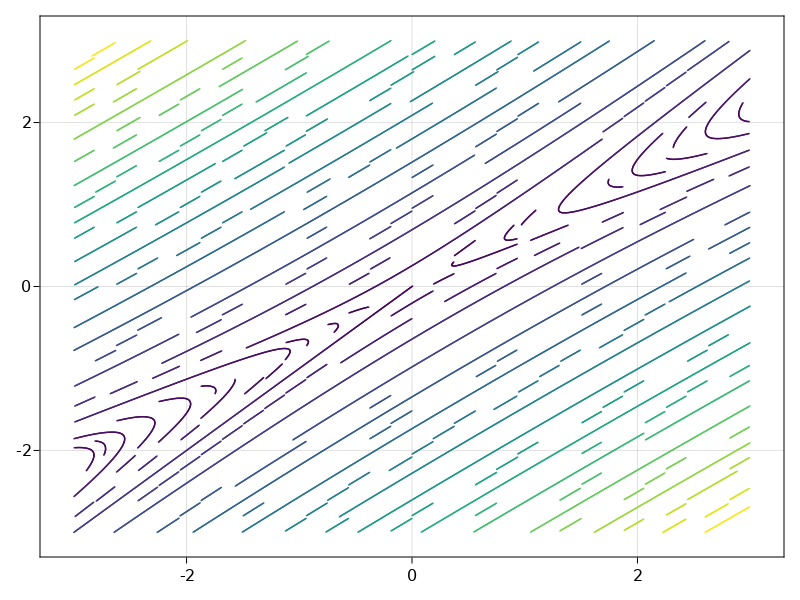

In [59]:
f1(X) = Point2(8X[1]-11X[2],6X[1]-9X[2])
streamplot(f1,-3:3,-3:3)

### Sumideros

Cuando tenemos eigenvalores negativos tenemos **sumideros**. Consideremos el sistema

$$
\frac{dY}{dt}=CY,\qquad \text{donde }C=\begin{pmatrix}
-1 & 0\\
0 & -4
\end{pmatrix}
$$

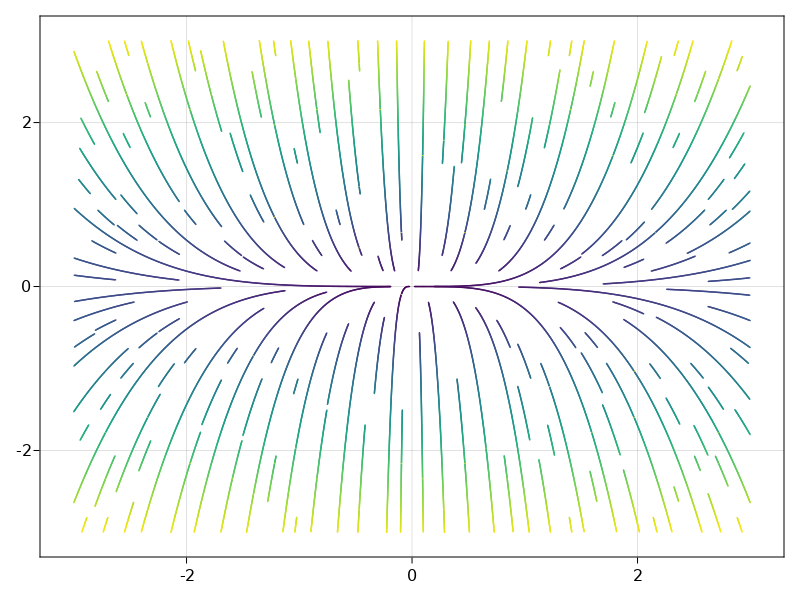

In [60]:
f2(X) = Point2(-X[1],-4X[2])
streamplot(f2,-3:3,-3:3)

El otro sistema es:

$$
\frac{dY}{dt}=DY,\qquad \text{donde }D=\begin{pmatrix}
-2 & -2\\
-1 & -3
\end{pmatrix}
$$

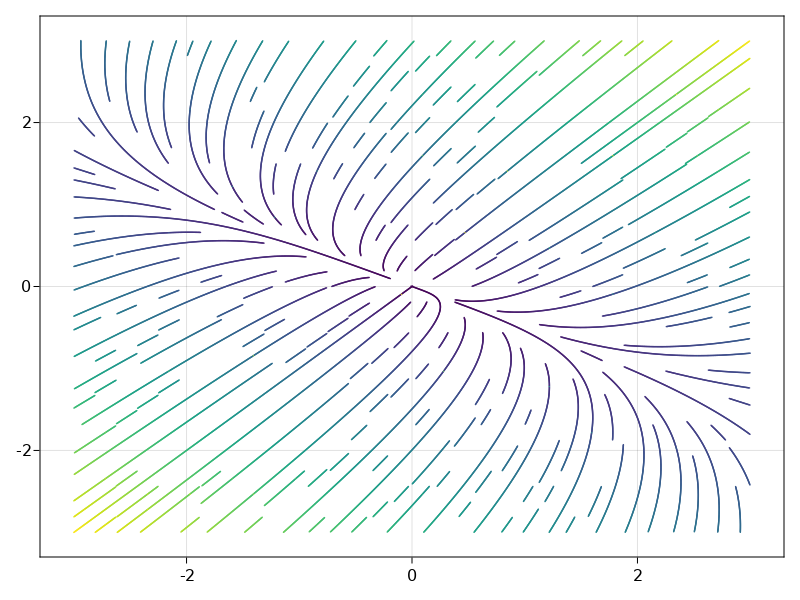

In [61]:
f3(X) = Point2(-2X[1]-2X[2],-X[1]-3X[2])
streamplot(f3,-3:3,-3:3)

### Fuentes

Cuando tenemos ambos eigenvalores positivos tenemos una **fuente**. Consideremos el sistema

$$
\frac{dY}{dt}=EY,\qquad \text{donde }E=\begin{pmatrix}
2 & 2\\
1 & 3
\end{pmatrix}
$$

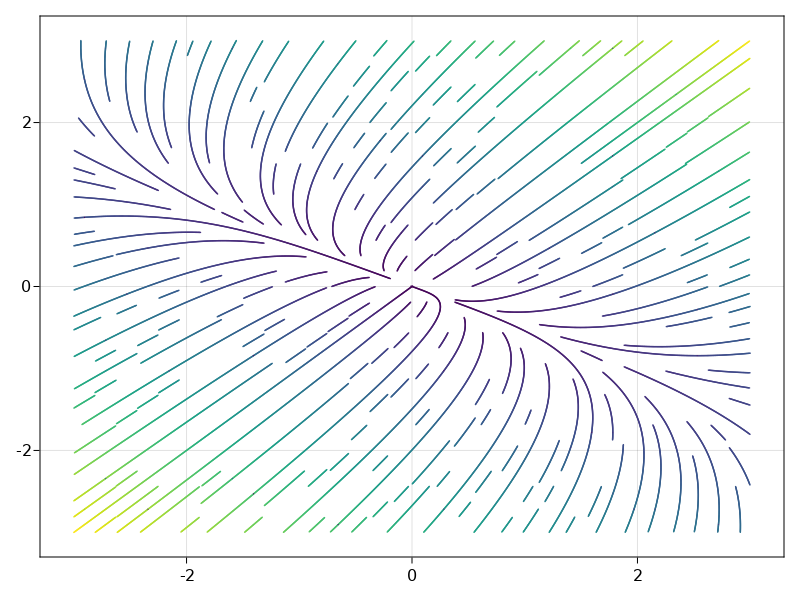

In [62]:
f4(X) = Point2(2X[1]+2X[2],X[1]+3X[2])
streamplot(f4,-3:3,-3:3)

## Eigenvalores complejos para sistemas lineales

Recordemos que sus soluciones se expresan a partir de eigenvalores complejos que nos orillan a eigenvectores complejos. Las soluciones tienen la forma general

$$
\begin{align*}
Y(t)&=e^{(a+ib)t}Y_0\\
Y(t)&=e^{at}(\cos bt+i\sin bt)Y_0
\end{align*}
$$

Veremos los distintos casos que existen para los distintos comportamientos de la exponencial real.

### Fuente espiral

Se dan para cuando el coeficiente $a$ es mayor que cero, haciendo que divergan en espiral las soluciones. Consideraremos el siguiente ejemplo

$$
\frac{dY}{dt}=\begin{pmatrix}
0 & 2\\
-3 & 2
\end{pmatrix}Y
$$

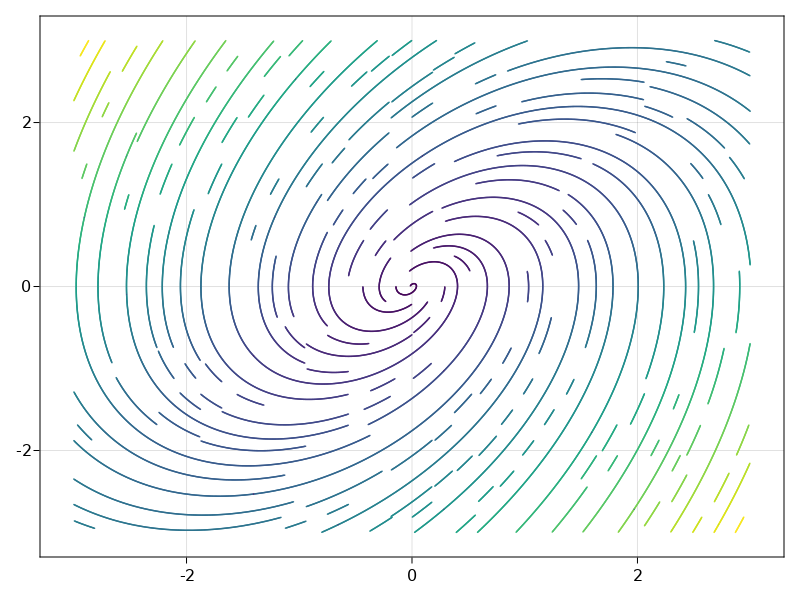

In [63]:
f5(X) = Point2(2X[2],-3X[1]+2X[2])
streamplot(f5,-3:3,-3:3)

### Centros

Se dan para soluciones periódicas, y esto ocurre cuando la exponencial es igual a 1, es decir cuando $a=0$. Revisando un par de sistemas lineales para centros tenemos

$$
\frac{dY}{dt}=\begin{pmatrix}
0 & 1\\
-2 & 0
\end{pmatrix}Y
$$

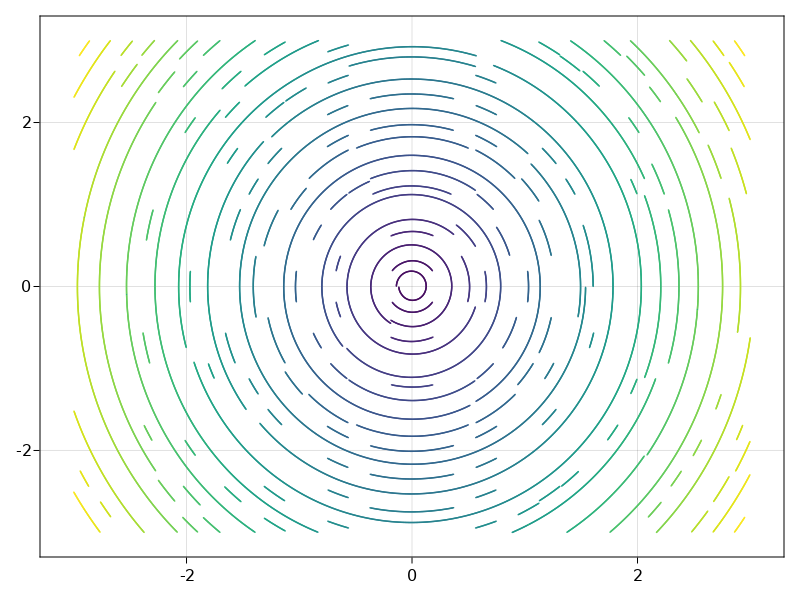

In [64]:
f6(X) = Point2(X[2],-2X[1])
streamplot(f6,-3:3,-3:3)

El otro es:

$$
\frac{dY}{dt}=\begin{pmatrix}
-3 & 10\\
-1 & 3
\end{pmatrix}Y
$$

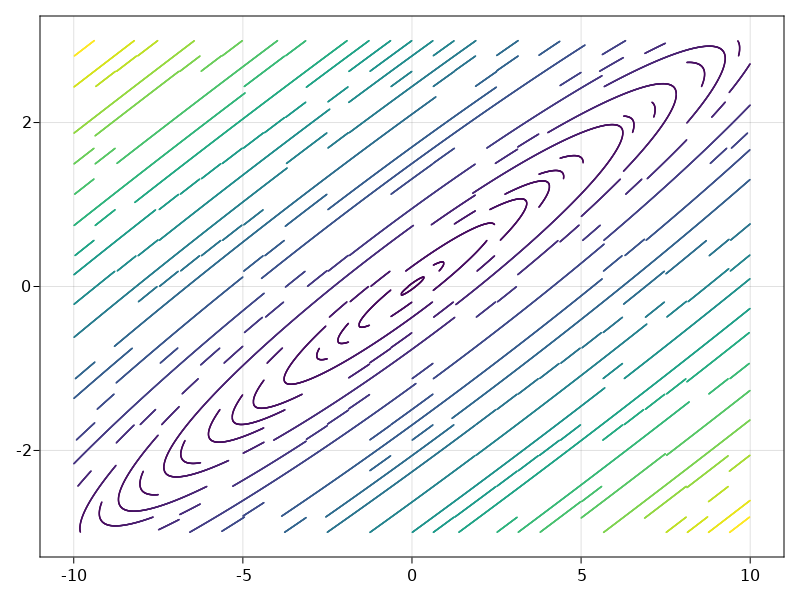

In [65]:
f7(X) = Point2(-3X[1]+10X[2],-X[1]+3X[2])
streamplot(f7,-10:10,-3:3)

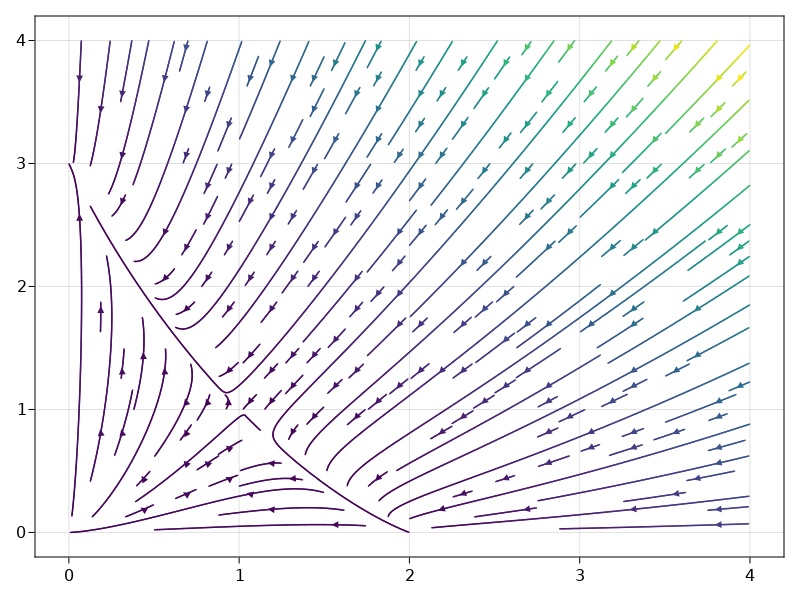

In [3]:
f8(X) = Point2(2X[1]*(1-X[1]/2-X[2]/2),3X[2]*(1-X[2]/3-2X[1]/3))
streamplot(f8,0:4,0:4,arrow_size=9)

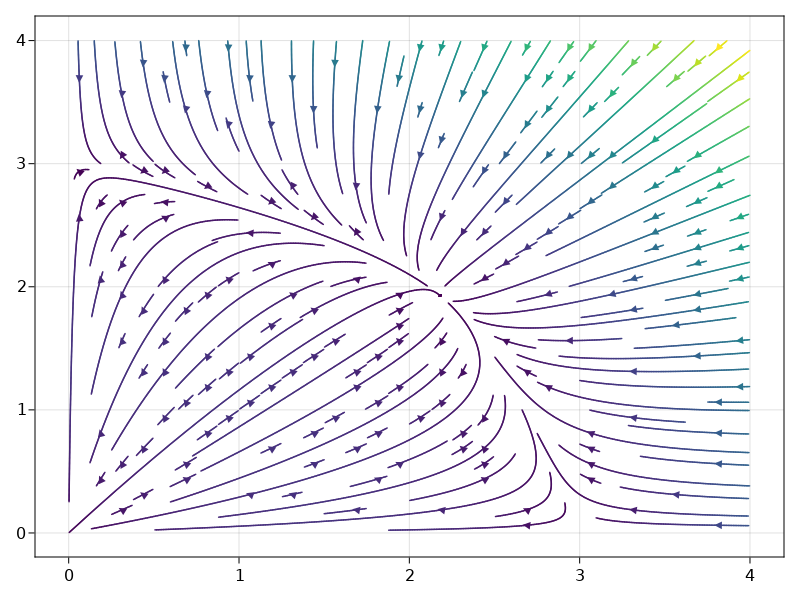

In [19]:
A = [ 1.0       0.424982
 ;0.492083  1.0]
f9(X) = Point2(2X[1]*(1-A[1,1]X[1]/3-A[1,2]X[2]/3),2X[2]*(1-A[2,2]X[2]/3-A[2,1]X[1]/3))
streamplot(f9,0:0.1:4,0:0.1:4,arrow_size=10)

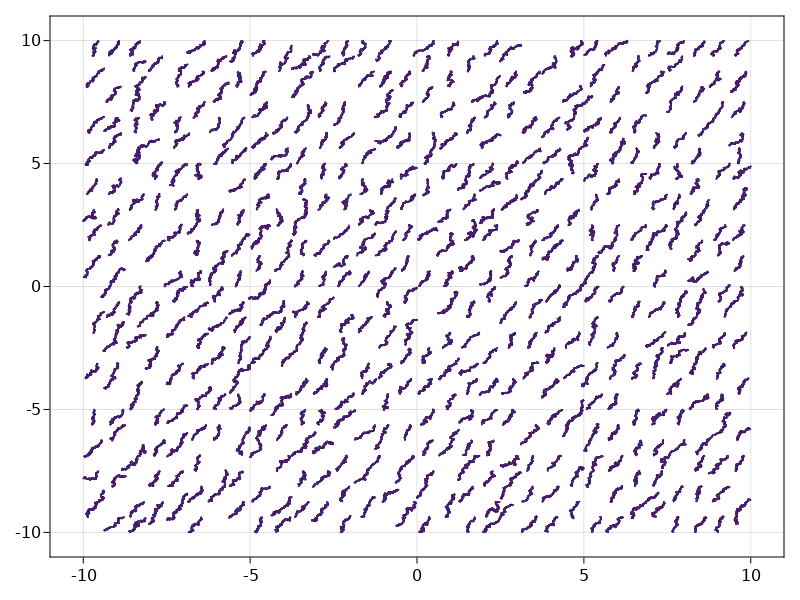

In [68]:
A=randn(2,2)
r = [2,3]
K = [2,3]
function sistema(X::Vector)
    sis = zeros(2)
    xs = zeros(2)
    for i in 1:2
        for j in 1:2
            xs[i] += A[i,j]*X[j]
        end
        sis[i] = r[i]*X[i]*(1-xs[i]/K[i])
    end
    return sis 
end

f10(X) = Point2(sistema(randn(2)))
streamplot(f10,-10:10,-10:10)